### Assignment #1  
Artem Chernitsa, B20-AI, a.chernitsa@innopolis  
*Cooperated with Vsevolod Klushev*


In [ ]:
from thinkdsp import read_wave, decorate, Wave, \
                    SinSignal, CosSignal, SquareSignal, Signal, \
                    SawtoothSignal, ComplexSinusoid
import sys

sys.setrecursionlimit(100_000)

wave = read_wave('ARTEM.wav')
wave.make_audio()

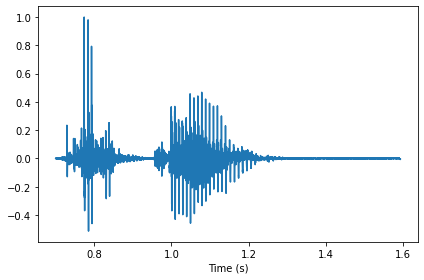

In [ ]:
start = 0.7
duration = 1.4
segment = wave.segment(start, duration) # check the important part of recording
segment.plot()
decorate(xlabel='Time (s)')

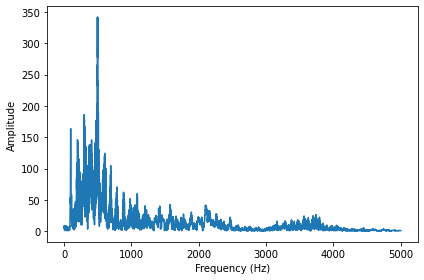

In [ ]:
spectrum = segment.make_spectrum()
spectrum.plot(high=5000)
decorate(ylabel='Amplitude', xlabel='Frequency (Hz)')

### CUT LETTERS

Trying to pull out individual letters from the record.

In [ ]:
let_A = wave.segment(0.65, 0.1)
let_A.make_audio()

# let_A.plot()

In [ ]:
let_R = wave.segment(0.76, 0.03)
let_R.make_audio()

# let_R.plot()

In [ ]:
let_T = wave.segment(0.93, 0.06)
let_T.make_audio()

# let_T.plot()

In [ ]:
let_E = wave.segment(1., 0.1)
let_E.make_audio()

# let_E.plot()

In [ ]:
let_M = wave.segment(1.15, 0.1)
let_M.make_audio()

# let_M.plot()

### Make signals

In [ ]:
def make_cool(wave: Wave, sig_type: Signal):
    '''
    Function get the segment and trying to apply
    summation of given signals to synthesize new wave.
    '''
    spectrum = wave.make_spectrum()
    peaks = spectrum.peaks()
    sig = SinSignal(freq=1, amp=0, offset=0)

    for peak in peaks:
        sig += sig_type(freq=peak[1], amp=peak[0], offset=0)

    dig_wave = sig.make_wave(start=wave.start, duration=wave.duration, framerate=11025)
    dig_wave.normalize()
    dig_wave.apodize()

    wave.plot() # original
    dig_wave.plot() # digitized

    return dig_wave

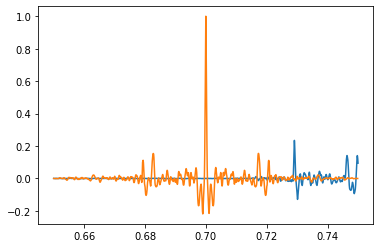

In [ ]:
dig_A = make_cool(let_A, CosSignal)
dig_A.make_audio()

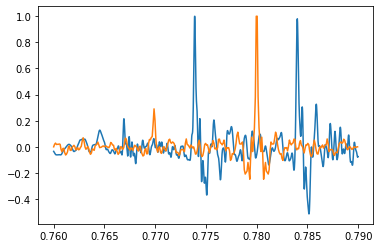

In [ ]:
dig_R = make_cool(let_R, CosSignal)
dig_R.make_audio()

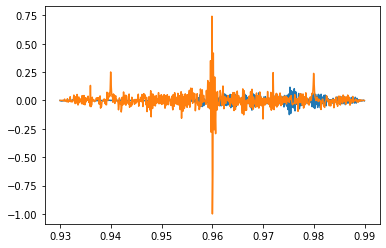

In [ ]:
dig_T = make_cool(let_T, SquareSignal)
dig_T.make_audio()

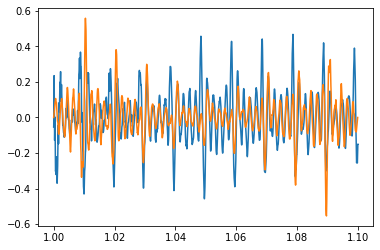

In [ ]:
dig_E = make_cool(let_E, SinSignal)
dig_E.make_audio()

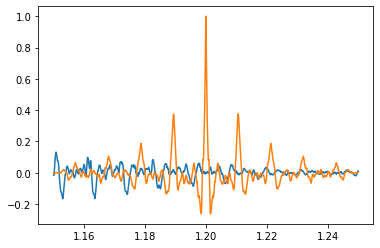

In [ ]:
dig_M = make_cool(let_M, CosSignal)
dig_M.make_audio()

### Build wave

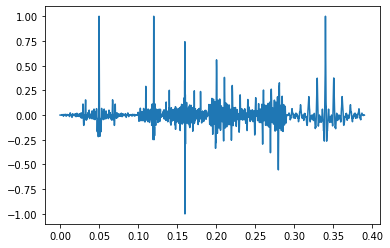

In [ ]:
new_wave = dig_A | dig_R | dig_T | dig_E | dig_M
new_wave.plot()
new_wave.make_audio()

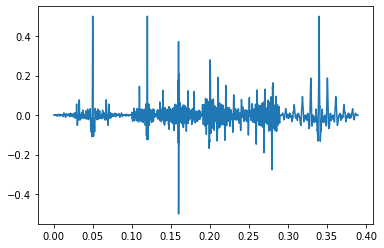

In [ ]:
new_wave.normalize(0.5)
new_wave.plot()
new_wave.make_audio()

### Save results

In [ ]:
to_save = {'A': dig_A, 'R': dig_R, 'T': dig_T, 'E': dig_E, 'M': dig_M}
for k, v in to_save.items():
    v.write(f'{k}.wav')

Writing A.wav
Writing R.wav
Writing T.wav
Writing E.wav
Writing M.wav


In [ ]:
new_wave.write('ARTEM_synt.wav')

Writing ARTEM_synt.wav
